In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:

def fun(x,y):
    """ Return a vector of values for the Rosenbrock function.
        Assume that x and y are 2D arrays of the same dimensions,
        e.g., created by np.mgrid[].   
    """
    val = 10*(y-x**2)**2+(1-x)**2
    return val# compute the Rosenbrock function values
def fun_gradient(x,y):
    """Returns a 3D array of dimension(n,n,2) of gradient values
       for the Rosenbrock function. x and y should 2D arrays
       of same dimensions, e.g., created by np.mgrid
       return a lenght 2 vector if n == 1
    """
    
    if type(x) is np.ndarray:
        # compute x-derivative dx
        dx = 40*x**3-40*x*y+ 2*x - 2
        # compute y-derivative dy
        dy = 20*(y-x**2)
        return np.squeeze(np.stack((dx, dy), axis=-1))
    else:
        dx = 40*x**3-40*x*y+ 2*x - 2
        dy = 20*(y-x**2)
        return np.array((dx,dy))
def fun_hessian(x, y):
    """Return a (n,n,2,2) array of hessian values for the Rosenbrock
       function. x and y shoudl be 1D arrays of the same length n 
       and entry (i,:,:) should contain the array of second derivatives
           dxx, dxy
           dxy, dyy
       at x[i], y[i].
       When n = 1, it should just return a (2,2) matrix.
       Contrary to Matlab where even a scalar is a 2D array, we need to 
       differentiate between scalars and arrays
    """
    if type(x) is np.ndarray:
        n, m = x.shape
        # compute second order derivative of the Rosenbrock function
        # dxx = d^2f/dx^2, dxy = d^2f/dxdy, dyy = d^2f/dy^2
        # By Schwarz theorem, dyx = d^2f/dydx = d^2f/dxdy = dxy
        dxx = 120*x**2-40*y + 2
        dxy = -40*x
        dyy = np.repeat(20,81*81)
        dyy = np.reshape(dyy,(81,81))
        H = np.zeros((n,n,2,2))
        H[:,:,0,0] = dxx
        H[:,:,0,1] = dxy
        H[:,:,1,0] = dxy
        H[:,:,1,1] = dyy
        return np.squeeze(H)
    else:
        n, m = 1, 1 # assume scalar values
        dxx = 120*x**2-40*y + 2
        dxy = -40*x
        dyy = 20
        mm = np.zeros((2,2))
        mm[0,0] = dxx
        mm[0,1] = dxy
        mm[1,0] = dxy
        mm[1,1] = dyy
        return mm

In [54]:
def func_m(fun,fun_gra,fun_hess,point,p):
    x = point[0]
    y = point[1]    
    fk = fun(x,y)
    second = np.dot(fun_gra(x,y),p)
    third = 0.5*np.dot(np.dot(p.T,fun_hess(x,y)),p)
    value = fk+second+third
    return value

In [ ]:
def func_m_gradient(fun,fun_gra,fun_hess,point,p):

In [559]:
p1,p2 = np.mgrid[-2:2:60j, -2:2:60j]
#p2 = np.linspace(-2,2,num = 20)
p1[1,1]

-1.9322033898305084

In [561]:
def draw_contour(p1,p2,point):
    nm = p1.shape[0]
    res = np.zeros((nm,nm))
    for i in range(nm):
        for j in range(nm):
            res[i,j] = func_m(fun,fun_gradient,fun_hessian,point,np.array([p1[i,j],p2[i,j]]))
    plt.contourf(p1,p2,res)
    plt.colorbar()
    plt.title('Contour plot of the quadratic function at (0,-1)')
    plt.xlabel('p1')
    plt.ylabel('p2')
    #plt.savefig(save)


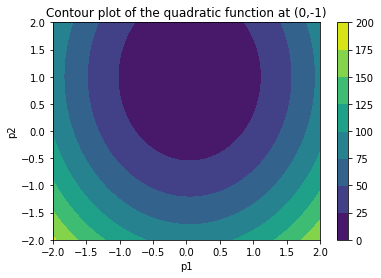

In [562]:
draw_contour(p1,p2,[0,-1])
plt.savefig('noh4_contour2.png')

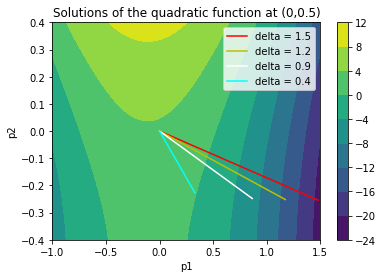

In [557]:
#（0，0.5）的情况
draw_contour(p1,p2,[0,0.5])
mx = [0,1.4784]
my = [0,-0.2541]
mx2 = [0,1.1732]
my2 = [0,-0.2518]
mx3 = [0,0.8651]
my3 = [0,-0.2480]
mx4 = [0,0.3294]
my4 = [0,-0.2269]
plt.plot(mx,my,c = 'r',label = 'delta = 1.5')
plt.plot(mx2,my2,c = 'y',label = 'delta = 1.2')
plt.plot(mx3,my3,c = 'white',label = 'delta = 0.9')
plt.plot(mx4,my4,c = 'cyan',label = 'delta = 0.4')
plt.legend()
plt.savefig('noh4_contour4.png')

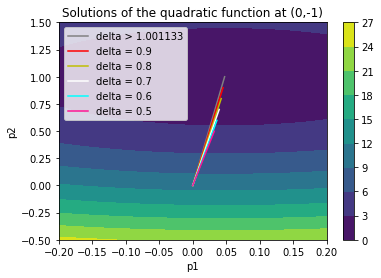

In [530]:
#给（0，-1）的情况
draw_contour(p1,p2,[0,-1])
mx = [0,0.04519]
my = [0,0.8988]
mx2 = [0,0.0425]
my2 = [0,0.7988]
mx3 = [0,0.0395]
my3 = [0,0.6988]
mx4 = [0,0.0361]
my4 = [0,0.5989]
mx0 = [0,0.0476]
my0 = [0,1]
mx5 = [0,0.0322]
my5 = [0,0.4989]
plt.plot(mx0,my0,c = 'gray',label = 'delta > 1.001133')
plt.plot(mx,my,c = 'r',label = 'delta = 0.9')
plt.plot(mx2,my2,c = 'y',label = 'delta = 0.8')
plt.plot(mx3,my3,c = 'white',label = 'delta = 0.7')
plt.plot(mx4,my4,c = 'cyan',label = 'delta = 0.6')
plt.plot(mx5,my5,c = 'deeppink', label = 'delta = 0.5')
plt.legend()
plt.savefig('noh4_contour1.png')

In [102]:
#B^-1*g 的值，当delta大于这个值，他就是解 full step pk
bg = np.linalg.norm(np.dot(np.linalg.inv(fun_hessian(0, -1)),fun_gradient(0,-1)))

In [103]:
bg

1.001133144839459

In [118]:
#现在当半径取1.5时，


In [389]:
#当delta大于1.001133时的pk值
pk_0 = -np.dot(np.linalg.inv(fun_hessian(0,-1)),fun_gradient(0,-1))
pk_0

array([0.04761905, 1.        ])

In [ ]:
#有包算gradient和hessian
#https://medium.com/@alexrachnog/optimization-cookbook-1-262aa5555b61
from numdifftools import Jacobian, Hessian
def fun(x):
    return (x[0]**2 + x[1]**2) + (0.5*x[0] + x[1])**2 + (0.5*x[0] + x[1])**4
def fun_der(x):
    return Jacobian(lambda x: fun(x))(x).ravel()
def fun_hess(x):
    return Hessian(lambda x: fun(x))(x)
minimize(fun, x0, method='dogleg', jac=fun_der, hess=fun_hess)

In [139]:
fun_gradient(0,-1)

array([ -2, -20])

In [147]:
delt = 1.5

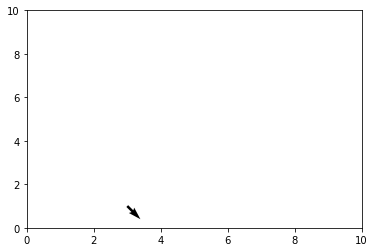

In [278]:
fig = plt.figure()
ax = fig.gca()

# Make the grid
x, y = np.meshgrid(np.array([3]),
                      np.array([1]))   #起点(1, 1, 1)

# Make the direction data for the arrows
u = np.array([1])
v = np.array([-1])
    # 方向(2, 4, 5)

h = ax.quiver(x, y, u, v, norm = 10) # 模长1
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)


plt.show()

In [536]:
def getp(la):
    #从lambda值求出pk方向向量
    #要根据p*的方程调整
    p = np.array([2/(-18+la),-10/(20+la)])
    return p

In [551]:
pk3 = getp(la4)
pk3

array([ 0.32941874, -0.22690504])

In [290]:
#这个有点问题
#def solutions(pk,x0,y0,la):
    k = pk[1]/pk[0]
    b = y0-k*x0
    #线段长度平方
    lsq = 4/(42+la)**2 + 400/(20+la)**2
    aa = k**2+1
    bb = 2*k*(b-y0)-2*x0
    cc = (b-y0)**2+x0**2-lsq
    resx = (-bb+(bb**2-4*aa*cc)**0.5)/2*aa
    resy = k*resx+b
    return resx,resy

In [373]:
0.5989/0.0361*0.02-1
#现在就是对几个任选的半径值求lambda并寻找可用的lambda值（方向指向上的），然后画图，但是没解决怎么使长度刚还为半径值


-0.6681994459833795

In [550]:
from sympy import *
import math
x = symbols('x')
#q求得的lambda值
la = solve(4/(-18+x)**2+100/(20+x)**2-0.16,x)
la1 = -28.3387
la2 = -13.32
la3 = 16.644
la4= 24.0713
la

[-45.0789103735303 + 0.e-20*I,
 8.50377101251629 - 2.02078914046777*I,
 8.50377101251629 + 2.02078914046777*I,
 24.0713683484978 + 0.e-20*I]

In [125]:
def pk(delt):
    s=fsolve(func,[delt**2,0,0])
    return s[0],s[1]

In [402]:
#4.2题
def rosenbrock(z):
    """ Return a scaler of values for the Rosenbrock function.
        Assume that z is a 2D point  
    """
    val = 100*(z[1]-z[0]**2)**2+(1-z[0])**2
    return val# compute the Rosenbrock function value
def rosenbrock_gradient(z):
    """Returns a 2D array gradient values
       for the Rosenbrock function.
    """
    x,y = z[0],z[1]
    dx = 400*x**3-400*x*y+ 2*x - 2
    dy = 200*(y-x**2)
    return np.array((dx,dy))
def rosenbrock_hessian(z):
    """Return a (2,2) array of hessian values for the Rosenbrock
       function. The entry (i,j) should contain the array of second derivatives
           dxx, dxy
           dxy, dyy
    """
    x,y = z[0],z[1]
    dxx = 1200*x**2-400*y + 2
    dxy = -400*x
    dyy = 200
    mm = np.zeros((2,2))
    mm[0,0] = dxx
    mm[0,1] = dxy
    mm[1,0] = dxy
    mm[1,1] = dyy
    return mm

In [406]:
rosenbrock_hessian([1,1])

array([[ 802., -400.],
       [-400.,  200.]])

In [424]:
def cal_pb(z):
    pb = -np.dot(np.linalg.inv(rosenbrock_hessian(z)),rosenbrock_gradient(z))
    return pb

In [423]:
def cal_pu(z):
    a = np.dot(rosenbrock_gradient(z),rosenbrock_gradient(z))
    b = np.dot(np.dot(rosenbrock_gradient(z),rosenbrock_hessian(z)),rosenbrock_gradient(z))
    c = a/b
    d = -np.dot(c,rosenbrock_gradient(z))
    return d


In [425]:
np.linalg.norm(cal_pu([1.1,1.1]))

0.04422872012574756

In [414]:
#rosenbrock
f = lambda x: (100*(x[1]-x[0]**2)**2 + (1-x[0])**2)
dfx1 = lambda x: (400*x[0]**3-400*x[0]*x[1]+ 2*x[0] - 2)
dfx2 = lambda x: (200*(x[1]-x[0]**2))
d2fx1 =lambda x: (1200*x[0]**2-400*x[1] + 2)
d2fx1x2 = d2fx2x1 =lambda x: (-400*x[0])
d2fx2 = lambda x: (200)

In [431]:
#model function mk
def mk(z,p):
    fk = rosenbrock(z)
    second = np.dot(rosenbrock_gradient(z).T, p)
    third = np.dot(np.dot(p.T,rosenbrock_hessian(z)),p)
    return fk + second+0.5*third

In [428]:
rat = rosenbrock_gradient([1.2,1.2])/np.linalg.norm(rosenbrock_gradient([1.2,1.2]))
p = -0.1*rat
p

array([-0.0923549 ,  0.03834805])

In [429]:
u = np.array([2,3])
np.square(u)

array([4, 9])

In [660]:
def trustregion(delta_hat,delta0,eta,x0):
    #calculate pho first
    cur_x = x0
    cur_delta = delta0
    precision = 0.00001
    gradient = 1
    x_list = []
    grad = []
    iters = 0
    it_max = 20
    radiusl = []
    while gradient > precision or iters < it_max: 
        prev_x = cur_x
        prev_delta = cur_delta
        pb = cal_pb(prev_x)
        pu = cal_pu(prev_x)
        if np.linalg.norm(pb) <= prev_delta:
            pk = pb
        elif np.linalg.norm(pu) > prev_delta:
            ratio = rosenbrock_gradient(prev_x)/np.linalg.norm(rosenbrock_gradient(prev_x))
            pk = -prev_delta*ratio
        else:
            a = np.square(np.linalg.norm(pb-pu))
            b = 2*np.dot(pu.T,pb-pu)
            c = np.square(np.linalg.norm(pu))-prev_delta**2
            al2 = (-b+np.sqrt(b**2-4*a*c))/(2*a)
            tau = al2 + 1
            if tau <= 1 and tau >= 0:
                pk = tau*pu
            elif tau <= 2 and tau >= 1:
                pk = pu+(tau-1)*(pb-pu)
        fenzi = f(prev_x)-f(prev_x+pk)
        fenmu = mk(prev_x,np.array([0,0]))-mk(prev_x,pk)
        rho = fenzi/fenmu
        print(pk)
        if rho < 0.25:
            cur_delta = 0.25*prev_delta
        if rho >= 0.75:
            if np.linalg.norm(pk) == prev_delta:
                cur_delta = min(2*prev_delta,delta_hat)
            else:
                cur_delta = prev_delta
        if rho > eta:
            cur_x = prev_x + pk
        else:
            cur_x = prev_x
        radiusl.append(cur_delta)
        gradient = np.linalg.norm(rosenbrock_gradient(cur_x))
        grad.append(gradient)
        x_list.append(cur_x)
        iters+=1
    return cur_x,grad,x_list,radiusl
        
    

In [664]:

bb,ff,gg,rr = trustregion(5,0.1,0.15,[1.10409,-0.5175])
gg

[-0.09109855  0.04124384]
[-0.17934458  0.08851848]
[-0.32112675  0.23849027]
[0.00584614 0.41791681]
[0.47836389 0.49596958]
[0.14047327 0.14236313]
[0.06084114 0.10320608]
[0.11250969 0.16535286]
[0.04674542 0.09075148]
[0.08424632 0.15027935]
[0.01521722 0.03641136]
[0.02064457 0.04062883]
[0.00088101 0.00218653]
[7.50853486e-05 1.50935599e-04]
[1.16559466e-08 2.89497025e-08]
[3.10862447e-15 6.32827124e-15]
[6.32827124e-15 1.26565425e-14]
[-0. -0.]
[-0. -0.]
[-0. -0.]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


[array([ 1.01299145, -0.47625616]),
 array([ 0.83364687, -0.38773768]),
 array([ 0.51252012, -0.14924741]),
 array([0.51836626, 0.2686694 ]),
 array([0.51836626, 0.2686694 ]),
 array([0.65883953, 0.41103254]),
 array([0.71968067, 0.51423862]),
 array([0.83219036, 0.67959148]),
 array([0.87893578, 0.77034297]),
 array([0.9631821 , 0.92062232]),
 array([0.97839932, 0.95703367]),
 array([0.99904389, 0.9976625 ]),
 array([0.9999249 , 0.99984904]),
 array([0.99999999, 0.99999997]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.])]

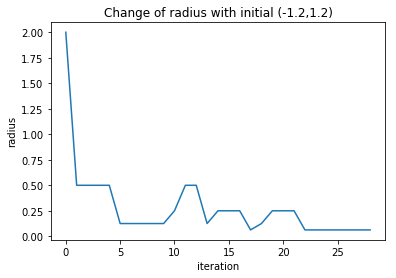

In [502]:
plt.plot(range(len(rr)),rr)
plt.xlabel('iteration')
plt.ylabel('radius')
plt.title('Change of radius with initial (-1.2,1.2)')
plt.savefig('noh4_radius2(-1.2).png')

In [465]:
bb

array([1., 1.])

In [503]:
def draw_convergence_rate(xlist,optimal):
    #凑成递减式
    hou = xlist[1:]
    qian = xlist[:len(xlist)-1]
    fenzi = hou-optimal
    fenzi = np.linalg.norm(fenzi, axis = 1)
    fenmu = qian-optimal
    fenmu = np.linalg.norm(fenmu, axis = 1)
    bizhi = fenzi/fenmu
    x = range(len(bizhi))
    plt.plot(x,bizhi, label = 'dogleg')
    plt.title('Convergence of x with initial (-1.2,1.2)')
    plt.xlabel('iteration')
    plt.ylabel('ratio')
    plt.legend()
    #plt.savefig(filename)
             

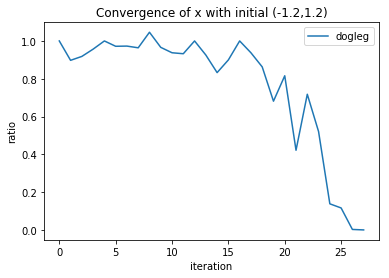

In [505]:
draw_convergence_rate(gg,bb)
plt.savefig('noh4_con2.png')

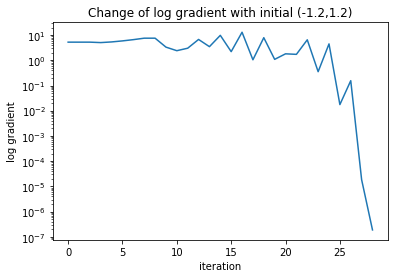

In [605]:
def draw_loggradient(gradlist):
    plt.plot(range(len(gradlist)),gradlist)
    plt.yscale('log')
    plt.xlabel('iteration')
    plt.ylabel('log gradient')
    plt.title('Change of log gradient with initial (-1.2,1.2)')
    #plt.savefig(filename)
draw_loggradient(ff)
plt.savefig('noh4_grad7.png')

In [654]:
#random initial starting points
from numpy.linalg import cholesky
#sampleNo = 100;
mu = 1
sigma = 10
np.random.seed(1)
s = np.random.normal(mu, sigma, (100,2) )
#plt.hist(s,100,normed=True)
s[0]

array([17.24345364, -5.11756414])

In [467]:
len(s)

100

In [655]:
#save the values for different initial points
import pandas as pd
gra_df = pd.DataFrame(np.zeros((100,4)),columns=['initial_x0','initial_x1','last_gradient','opt'])
#gra_df
for i in range(len(s)):
    op,gr,xl,rr = trustregion(5,2,0.2,s[i])
    gra_df.iloc[i,0] = s[i][0]
    gra_df.iloc[i,1] = s[i][1]
    gra_df.iloc[i,2] = gr[len(gr)-1]
    gra_df.iloc[i,3] = str(op)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


In [656]:
pd.options.display.max_rows = 100
gra_df

,initial_x0,initial_x1,last_gradient,opt
0,17.243454,-5.117564,2.552070e-11,[1. 1.]
1,-4.281718,-9.729686,4.388181e-11,[1. 1.]
2,9.654076,-22.015387,1.928684e-06,[0.99999993 0.99999986]
3,18.448118,-6.612069,3.036687e-12,[1. 1.]
4,4.190391,-1.493704,3.601849e-11,[1. 1.]
5,15.621079,-19.601407,1.524242e-07,[1. 0.99999999]
6,-2.224172,-2.840544,6.200856e-11,[1. 1.]
7,12.337694,-9.998913,7.208592e-09,[1. 1.]
8,-0.724282,-7.778584,1.662534e-10,[1. 1.]
9,1.422137,6.828152,2.449322e-10,[1. 1.]


In [657]:
gra_df.sort_values("last_gradient",inplace=True)
gra_df

,initial_x0,initial_x1,last_gradient,opt
97,7.590498,-15.274383,0.000000e+00,[1. 1.]
67,8.928069,-5.235307,0.000000e+00,[1. 1.]
22,1.508078,-5.369956,0.000000e+00,[1. 1.]
87,1.436690,-1.263142,0.000000e+00,[1. 1.]
24,2.201590,7.172031,3.552714e-14,[1. 1.]
92,-0.104470,-5.173621,4.973799e-14,[1. 1.]
78,-0.364447,-0.190542,5.577874e-14,[1. 1.]
81,3.487992,-1.966412,6.039613e-14,[1. 1.]
68,6.205763,-10.443414,4.015532e-13,[1. 1.]
83,10.863352,3.135339,3.000917e-12,[1. 1.]


In [658]:
#get 10%,50% and 90%
p10a,p10b = gra_df.iloc[9,0:2]
p50a,p50b = gra_df.iloc[49,0:2]
p90a,p90b = gra_df.iloc[89,0:2]
three = [np.array([p10a,p10b]),np.array([p50a,p50b]),np.array([p90a,p90b])]

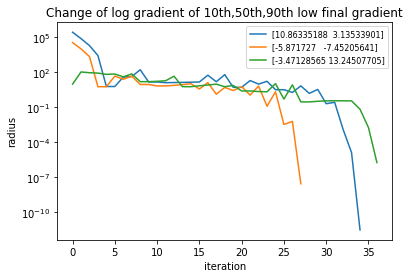

In [659]:
for i in three:
    op,gr,xl,rr = trustregion(5,2,0.2,i)
    xx = range(len(gr))
    plt.plot(xx,gr,label = str(i))
    plt.yscale('log')
    plt.xlabel('iteration')
    plt.ylabel('radius')
    plt.title('Change of log gradient of 10th,50th,90th low final gradient')
    plt.legend(prop={'size': 8})
    plt.savefig('noh4_grad100ini4.png')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


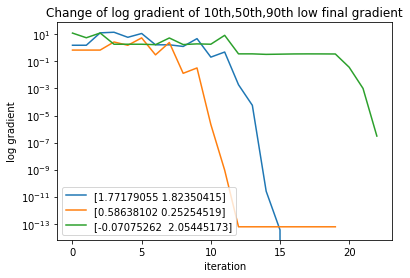

In [488]:
for i in three:
    op,gr,xl,rr = trustregion(5,2,0.2,i)
    xx = range(len(gr))
    plt.plot(xx,gr,label = str(i))
    plt.yscale('log')
    plt.xlabel('iteration')
    plt.ylabel('log gradient')
    plt.title('Change of log gradient of 10th,50th,90th low final gradient')
    plt.legend()
    plt.savefig('noh4_grad100ini1.png')